### Importing Dependencies

In [1]:
import pandas as pd
import vectorbt as vbt
from tqdm import tqdm
import matplotlib.pyplot as plt
import empyrical as ep

/Users/vkotopoulos/Dev/vkotopoulos/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning:

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



### Loading price data

In [7]:
import requests

def get_usdc_futures_pairs():
    url = 'https://fapi.binance.com/fapi/v1/exchangeInfo'
    response = requests.get(url)
    data = response.json()

    usdc_pairs = []
    for symbol_info in data['symbols']:
        if symbol_info['quoteAsset'] == 'USDC' and symbol_info['status'] == 'TRADING':
            usdc_pairs.append(symbol_info['symbol'])

    return usdc_pairs

pairs = get_usdc_futures_pairs()
len(pairs)

32

In [35]:
close = {}
for pair in tqdm(pairs):
    try:
        close[pair] = vbt.BinanceData.download([pair], start='2015-01-01', show_progress=False).get('Close')
    except:
        pass
close = pd.DataFrame(close)
close

100%|██████████| 32/32 [01:14<00:00,  2.34s/it]


,BTCUSDC,ETHUSDC,BNBUSDC,SOLUSDC,XRPUSDC,DOGEUSDC,SUIUSDC,LINKUSDC,ORDIUSDC,WLDUSDC,...,TIAUSDC,BOMEUSDC,ENAUSDC,ETHFIUSDC,CRVUSDC,KAITOUSDC,TRUMPUSDC,ADAUSDC,PNUTUSDC,HBARUSDC
Open time,,,,,,,,,,,,,,,,,,,,,
2018-12-15 00:00:00+00:00,3183.47,82.98,4.4839,NaN,0.28139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-16 00:00:00+00:00,3199.27,83.79,4.6068,NaN,0.28381,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-17 00:00:00+00:00,3494.65,93.88,5.0147,NaN,0.32669,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-18 00:00:00+00:00,3670.11,100.78,5.5633,NaN,0.35095,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-19 00:00:00+00:00,3676.32,99.12,5.3806,NaN,0.34561,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-20 00:00:00+00:00,106893.99,2525.67,650.3200,168.66,2.35710,0.22633,3.8555,15.71,9.837,1.115,...,2.680,0.002225,0.3780,1.276,0.7077,1.9485,14.45,0.7463,0.3251,0.19496
2025-05-21 00:00:00+00:00,109702.20,2552.39,673.6500,173.63,2.39620,0.23411,3.9312,16.11,10.422,1.193,...,2.648,0.002341,0.3962,1.330,0.7436,2.1701,14.39,0.7695,0.3540,0.19813
2025-05-22 00:00:00+00:00,111731.20,2665.40,686.7300,179.73,2.43150,0.24564,3.8900,16.74,11.269,1.515,...,2.839,0.002614,0.4166,1.357,0.8239,2.1687,14.73,0.8094,0.3801,0.20472


In [2]:
open = pd.read_csv('binance_usdt_futures_open.csv')
high = pd.read_csv('binance_usdt_futures_high.csv')
low = pd.read_csv('binance_usdt_futures_low.csv')
close = pd.read_csv('binance_usdt_futures_close.csv')
volume = pd.read_csv('binance_usdt_futures_volume.csv')

open['Open time'] = pd.to_datetime(open['Open time'])
open.set_index('Open time', inplace=True)

high['Open time'] = pd.to_datetime(high['Open time'])
high.set_index('Open time', inplace=True)

low['Open time'] = pd.to_datetime(low['Open time'])
low.set_index('Open time', inplace=True)

close['Open time'] = pd.to_datetime(close['Open time'])
close.set_index('Open time', inplace=True)

volume['Open time'] = pd.to_datetime(volume['Open time'])
volume.set_index('Open time', inplace=True)

### Simple Donchian Breakout on BTC

<Axes: xlabel='Open time'>

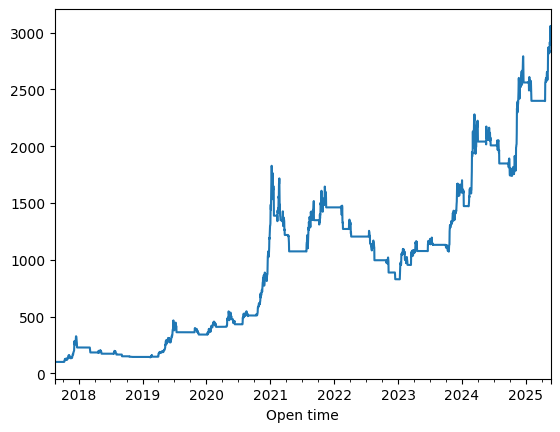

In [4]:
donchian_upper = close.rolling(30).max().shift()
donchian_lower = close.rolling(30).min().shift()
donchian_middle = (donchian_upper + donchian_lower) / 2

entries = close > donchian_upper
exits = close.vbt.crossed_below(donchian_middle)

pf = vbt.Portfolio.from_signals(close['BTCUSDT'], 
                                entries=entries['BTCUSDT'], 
                                exits=exits['BTCUSDT'],
                                fees=0.001)

pf.value().plot()


### Multi-lookback Performance Evaluation

<Axes: xlabel='Open time'>

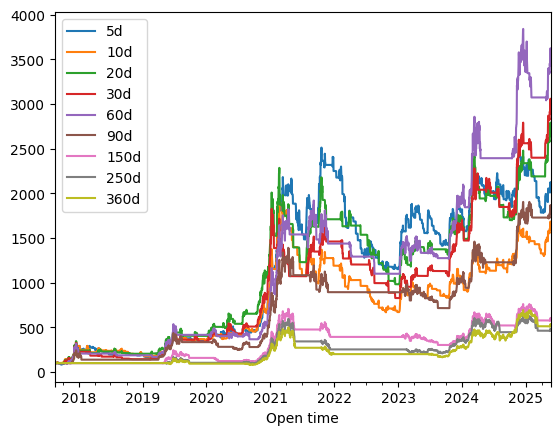

In [5]:
# Define lookback periods
lookbacks = [5, 10, 20, 30, 60, 90, 150, 250, 360]

# Get BTC price data into a DataFrame and replicate it for each lookback
btc_price = close['BTCUSDT']
price = pd.DataFrame({f'{lb}d': btc_price.values for lb in lookbacks}, 
                    index=btc_price.index)

# Initialize DataFrames for signals
donchian_upper_df = pd.DataFrame()
donchian_lower_df = pd.DataFrame()
donchian_middle_df = pd.DataFrame()
entries = pd.DataFrame() 
exits = pd.DataFrame()

# Calculate Donchian channels for each lookback
for lb in lookbacks:
    donchian_upper_df[f'{lb}d'] = btc_price.rolling(lb).max().shift()
    donchian_lower_df[f'{lb}d'] = btc_price.rolling(lb).min().shift()
    donchian_middle_df[f'{lb}d'] = (donchian_upper_df[f'{lb}d'] + donchian_lower_df[f'{lb}d']) / 2
    
    entries[f'{lb}d'] = btc_price > donchian_upper_df[f'{lb}d']
    exits[f'{lb}d'] = btc_price.vbt.crossed_below(donchian_middle_df[f'{lb}d'])

# Run portfolio backtest for each lookback period
pf = vbt.Portfolio.from_signals(price,
                               entries=entries,
                               exits=exits,
                               fees=0.001)

pf.value().plot()


### Ensemble Model

##### Simple equal-weighted average across lookbacks (combo portfolio)

<Axes: xlabel='Open time'>

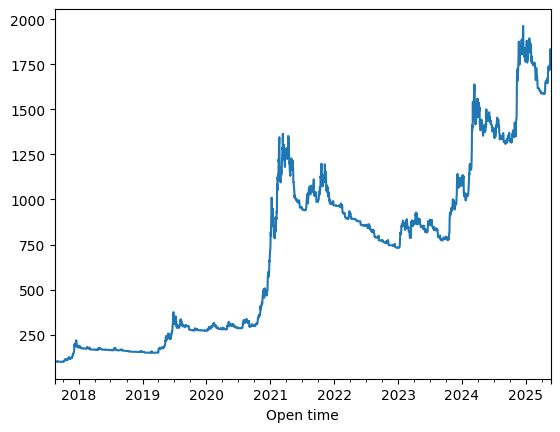

In [6]:
pf.returns().mean(axis=1).add(1).cumprod().mul(100).plot()

##### Generating signals by exposure

<Axes: xlabel='Open time'>

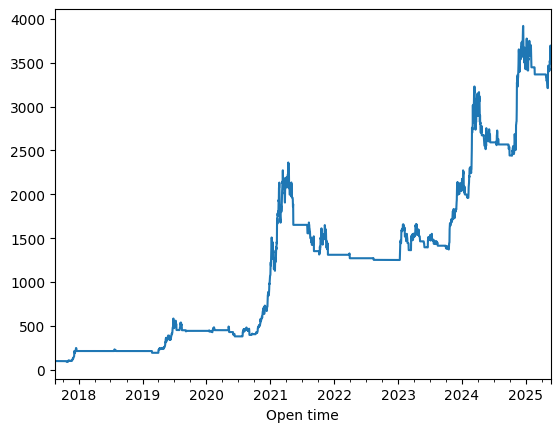

In [7]:
exposure = pf.assets() > 0
agg_exposure = exposure.sum(axis=1)

pf_ensemble = vbt.Portfolio.from_signals(btc_price,
                               entries=agg_exposure > (len(lookbacks) / 2),
                               exits=agg_exposure < (len(lookbacks) / 2),
                               fees=0.001)

pf_ensemble.value().plot()


### Portfolio

In this section, we try to replicate the portfolio construction highlighted in the paper.

Essentially, we run the ensemble model across all assets in our tradable universe (we run for all, as we only have 32 tradable USDC-based tokens) and 
we allocate equally our capital across all of them.

In [9]:
universe = ['BTCUSDT', 'BNBUSDT', 'ADAUSDT', 'DOGEUSDT', 'ETHUSDT', 'XRPUSDT', 'SOLUSDT']

In [11]:
# Define lookback periods
lookbacks = [5, 10, 20, 30, 60, 90, 150, 250, 360]

# Initialize dictionary to store portfolio objects
portfolios = {}
trades = {}

# Loop through each token
for token in universe:
    # Get price data for current token into a DataFrame and replicate it for each lookback
    token_price = close[token]
    price = pd.DataFrame({f'{lb}d': token_price.values for lb in lookbacks}, 
                        index=token_price.index)
    
    # Initialize DataFrames for signals
    donchian_upper_df = pd.DataFrame()
    donchian_lower_df = pd.DataFrame()
    donchian_middle_df = pd.DataFrame()
    entries = pd.DataFrame() 
    exits = pd.DataFrame()
    
    # Calculate Donchian channels for each lookback
    for lb in lookbacks:
        donchian_upper_df[f'{lb}d'] = token_price.rolling(lb).max().shift()
        donchian_lower_df[f'{lb}d'] = token_price.rolling(lb).min().shift()
        donchian_middle_df[f'{lb}d'] = (donchian_upper_df[f'{lb}d'] + donchian_lower_df[f'{lb}d']) / 2
        
        entries[f'{lb}d'] = token_price > donchian_upper_df[f'{lb}d']
        exits[f'{lb}d'] = token_price.vbt.crossed_below(donchian_middle_df[f'{lb}d'])
    
    # Run portfolio backtest for each lookback period and store in dictionary
    _pf = vbt.Portfolio.from_signals(price,
                                    entries=entries,
                                    exits=exits,
                                    fees=0.001)
    
    exposure = _pf.assets() > 0
    agg_exposure = exposure.sum(axis=1)

    pf_ensemble = vbt.Portfolio.from_signals(token_price,
                                entries=agg_exposure > (len(lookbacks) / 2),
                                exits=agg_exposure < (len(lookbacks) / 2),
                                fees=0.001)
    
    portfolios[token] = pf_ensemble.returns()
    trades[token] = pf_ensemble.trades.records_readable

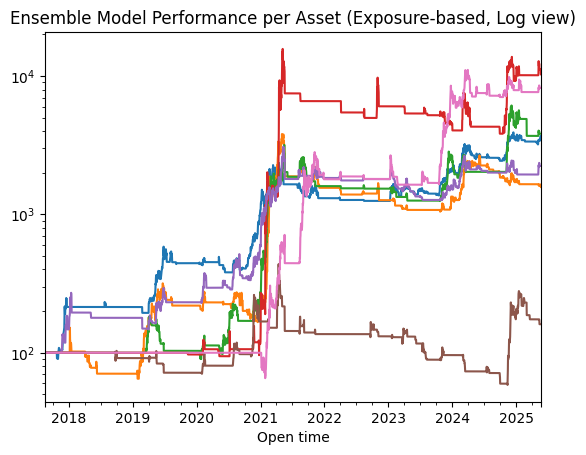

In [12]:
pd.DataFrame(portfolios).add(1).cumprod().mul(100).plot(logy=True)
plt.legend().set_visible(False)
plt.title('Ensemble Model Performance per Asset (Exposure-based, Log view)')
plt.show()

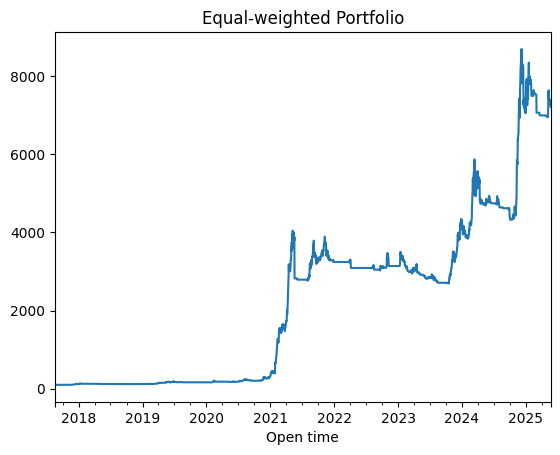

In [13]:
pd.DataFrame(portfolios).mean(axis=1).add(1).cumprod().mul(100).plot()
plt.title('Equal-weighted Portfolio')
plt.show()


In [15]:
pfreturns = pd.DataFrame(portfolios).mean(axis=1)
pfvalue = pd.DataFrame(portfolios).mean(axis=1).add(1).cumprod().mul(100)

/var/folders/62/vhyyy_pj6mb9045zds49k55c0000gn/T/ipykernel_28534/1420918161.py:8: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



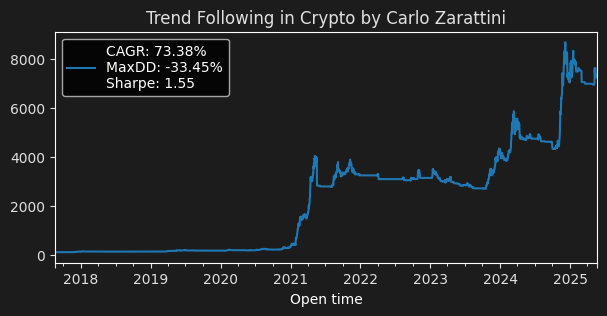

In [16]:
# Plotting results
CLR_BG     = "#1C1C1C"   # dark grey background
CLR_AX     = "#E0E0E0"   # light grey ticks/labels
plt.style.use('dark_background')
pfvalue.plot(color='#1f77b4', figsize=(7, 3))
plt.gca().set_facecolor(CLR_BG)
plt.gcf().set_facecolor(CLR_BG)
plt.legend().set_visible(False)
plt.title('Trend Following in Crypto by Carlo Zarattini', color=CLR_AX)
plt.tick_params(colors=CLR_AX)

# Calculate metrics
sharpe = round(ep.sharpe_ratio(pfreturns, annualization=365), 2)
cagr = round(ep.cagr(pfreturns, annualization=365) * 100, 2)
maxdd = round(ep.max_drawdown(pfreturns) * 100, 2)

# Add metrics to plot legend
plt.legend([f'CAGR: {cagr}%\nMaxDD: {maxdd}%\nSharpe: {sharpe}'])

# Save figure before showing
plt.savefig('./figures/donchian_channels_by_carlo_zarattini.png', bbox_inches='tight', transparent=False, facecolor=CLR_BG)
plt.show()

### Inspecting the signal strength

In [14]:
agg_trades = pd.concat(trades.values(), keys=trades.keys()).reset_index(level=0).rename(columns={'level_0': 'Asset'})
agg_trades.Return.describe()

count    290.000000
mean       0.219147
std        1.160697
min       -0.336551
25%       -0.060604
50%       -0.021807
75%        0.054772
max       11.361154
Name: Return, dtype: float64

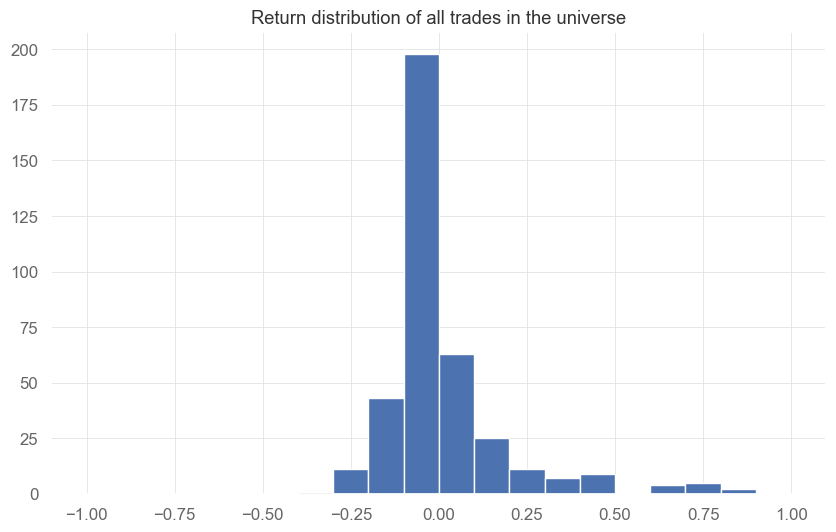

In [75]:
agg_trades.Return.hist(range=(-1, 1), bins=20)
plt.title('Return distribution of all trades in the universe')
plt.show()


In [84]:
print('Win Rate:', round(len(agg_trades[agg_trades.Return > 0]) / len(agg_trades), 2) * 100, '%')

Win Rate: 35.0 %


We observe the following:

1. The win rate is pretty low (35%) and the return distribution is has a long right tail with concentration around 0, which is common in trend-following strategies
2. The avg return is pretty high (10%), indicating strong potential

### Appendix A : Shorting

In this section we test the ensemble model (exposure) with shorting incorporated.

<Axes: xlabel='Open time'>

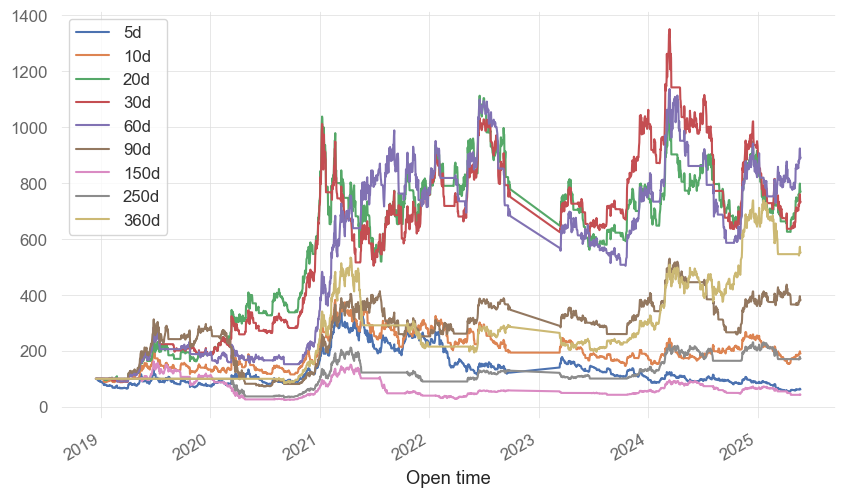

In [91]:
# Define lookback periods
lookbacks = [5, 10, 20, 30, 60, 90, 150, 250, 360]

# Get BTC price data into a DataFrame and replicate it for each lookback
btc_price = close['BTCUSDC']
price = pd.DataFrame({f'{lb}d': btc_price.values for lb in lookbacks}, 
                    index=btc_price.index)

# Initialize DataFrames for signals
donchian_upper_df = pd.DataFrame()
donchian_lower_df = pd.DataFrame()
donchian_middle_df = pd.DataFrame()
entries = pd.DataFrame() 
exits = pd.DataFrame()
short_entries = pd.DataFrame()
short_exits = pd.DataFrame()

# Calculate Donchian channels for each lookback
for lb in lookbacks:
    donchian_upper_df[f'{lb}d'] = btc_price.rolling(lb).max().shift()
    donchian_lower_df[f'{lb}d'] = btc_price.rolling(lb).min().shift()
    donchian_middle_df[f'{lb}d'] = (donchian_upper_df[f'{lb}d'] + donchian_lower_df[f'{lb}d']) / 2
    
    entries[f'{lb}d'] = btc_price > donchian_upper_df[f'{lb}d']
    exits[f'{lb}d'] = btc_price.vbt.crossed_below(donchian_middle_df[f'{lb}d'])

    short_entries[f'{lb}d'] = btc_price < donchian_lower_df[f'{lb}d']
    short_exits[f'{lb}d'] = btc_price.vbt.crossed_above(donchian_middle_df[f'{lb}d'])

# Run portfolio backtest for each lookback period
pf = vbt.Portfolio.from_signals(price,
                               entries=entries,
                               exits=exits,
                               short_entries=short_entries,
                               short_exits=short_exits,
                               fees=0.001)

pf.value().plot()


<Axes: xlabel='Open time'>

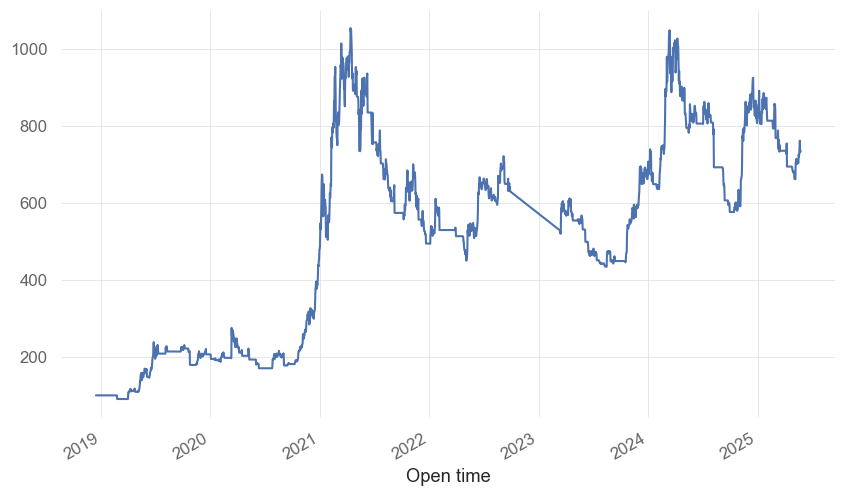

In [ ]:
long_exposure = (pf.assets() > 0).sum(axis=1)
short_exposure = (pf.assets() < 0).sum(axis=1)

entries = (long_exposure > short_exposure) & (long_exposure > (len(lookbacks) / 2))
short_entries = (short_exposure > long_exposure) & (short_exposure > (len(lookbacks) / 2))

exits = (long_exposure < short_exposure) | (long_exposure < (len(lookbacks) / 2))
short_exits = (short_exposure < long_exposure) | (short_exposure < (len(lookbacks) / 2))

pf_ensemble = vbt.Portfolio.from_signals(btc_price,
                               entries=entries,
                               exits=exits,
                               short_entries=short_entries,
                               short_exits=short_exits,
                               fees=0.001)

pf_ensemble.value().plot()

### Appendix B : Incorporating a Regime Filter

From the equity curve above we can derive a cyclical pattern, which coincides with the 50-day moving average regime filter. Thus, we will only trade the asset (long & short) if its price is above the MA50. We decide to use this regime filter for both long and short entries, as below the MA the price is fairly unpredictable/highly volatile.

<Axes: xlabel='Open time'>

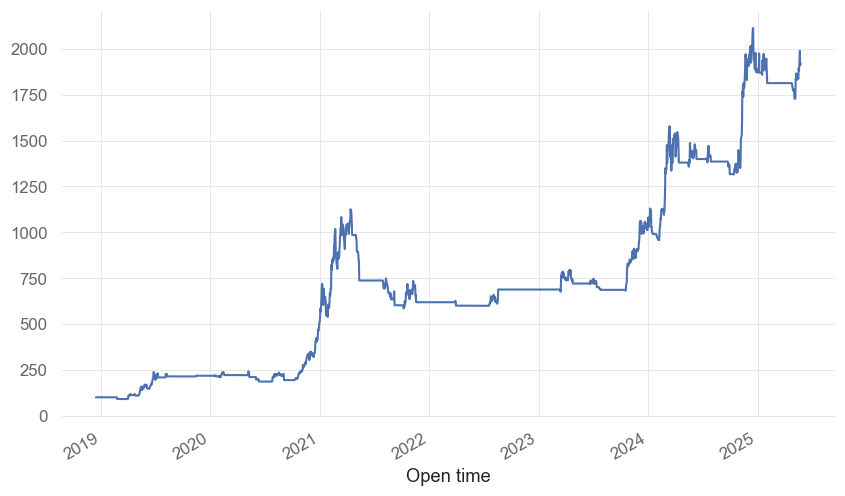

In [103]:
long_exposure = (pf.assets() > 0).sum(axis=1)
short_exposure = (pf.assets() < 0).sum(axis=1)

regime_filter = btc_price > btc_price.rolling(50).mean().shift()

entries = (long_exposure > short_exposure) & (long_exposure > (len(lookbacks) / 2)) & regime_filter
short_entries = (short_exposure > long_exposure) & (short_exposure > (len(lookbacks) / 2)) & regime_filter

exits = (long_exposure < short_exposure) | (long_exposure < (len(lookbacks) / 2)) | ~regime_filter
short_exits = (short_exposure < long_exposure) | (short_exposure < (len(lookbacks) / 2)) | ~regime_filter

pf_ensemble = vbt.Portfolio.from_signals(btc_price,
                               entries=entries,
                               exits=exits,
                               short_entries=short_entries,
                               short_exits=short_exits,
                               fees=0.001)

pf_ensemble.value().plot()


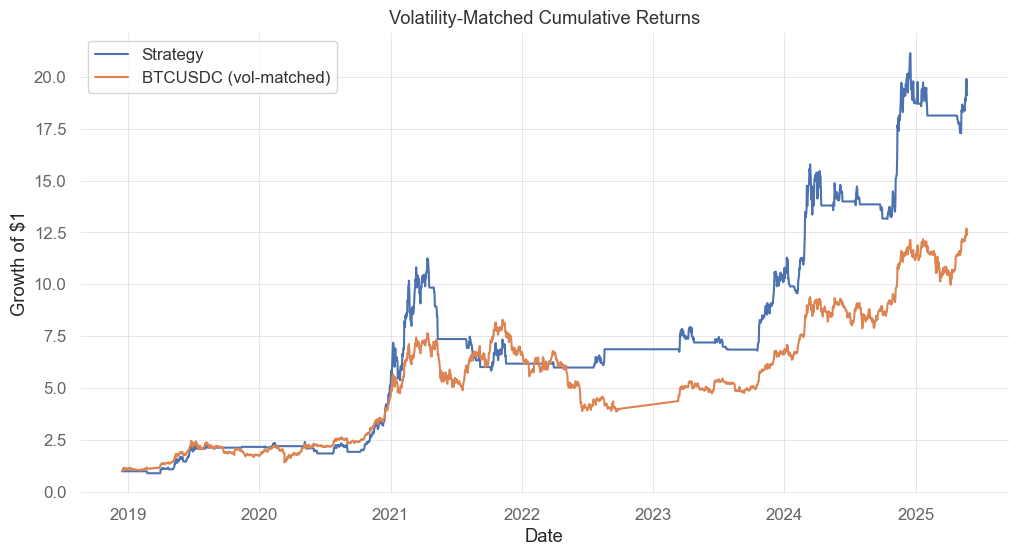

In [125]:
strategy_returns = pf_ensemble.returns()
benchmark_returns = btc_price.pct_change()

strategy_vol = strategy_returns.std() * (252**0.5)
benchmark_vol = benchmark_returns.std() * (252**0.5)

scaling_factor = strategy_vol / benchmark_vol

benchmark_vol_matched = benchmark_returns * scaling_factor

strategy_cum = (1 + strategy_returns).cumprod()
benchmark_cum = (1 + benchmark_vol_matched).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(strategy_cum, label='Strategy')
plt.plot(benchmark_cum, label='BTCUSDC (vol-matched)')
plt.title('Volatility-Matched Cumulative Returns')
plt.ylabel('Growth of $1')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

